<a href="https://colab.research.google.com/github/Caarloh/MLColabs/blob/linreg/Regresi%C3%B3n_lineal_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

*Carlos Sandoval*

Primero, insertaremos las librerias e indagaremos un poco en el conjunto de datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark")

import numpy as np # linear algebra
import pandas as pd

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

Observemos los datos en un grafico de dispersión, donde se pondran los HorsePower contra el rendimiento del vehiculo, para diferentes pesosd y paises de origen:

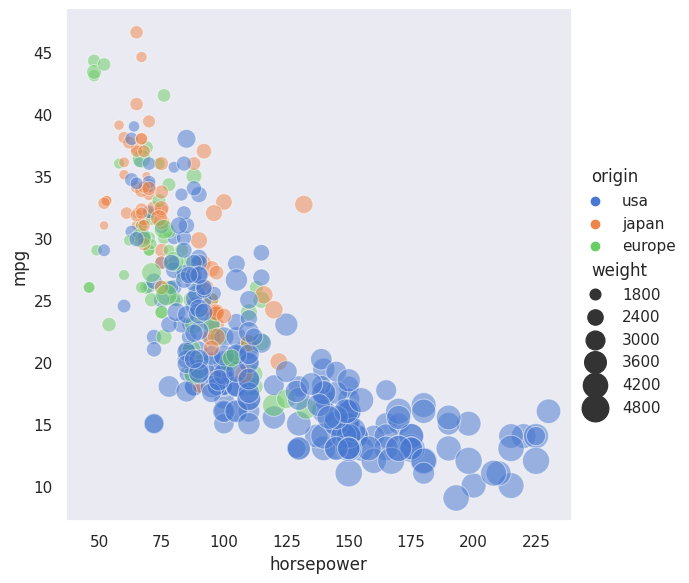

In [ ]:
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

Podemos notar que en USA se fabrican vehiculos más pesados, con más caballos de fuerza pero que su rendimiento es bastante bajo, al contrario, Japon y Europa haciendo vehículos que rinden más pero con menos caballos de fuerza.

Tomemos en consideración que Japón y Europa es mucho más urbano que USA, por eso esta tendencia, veamos nuestro gráfico por país de origen:

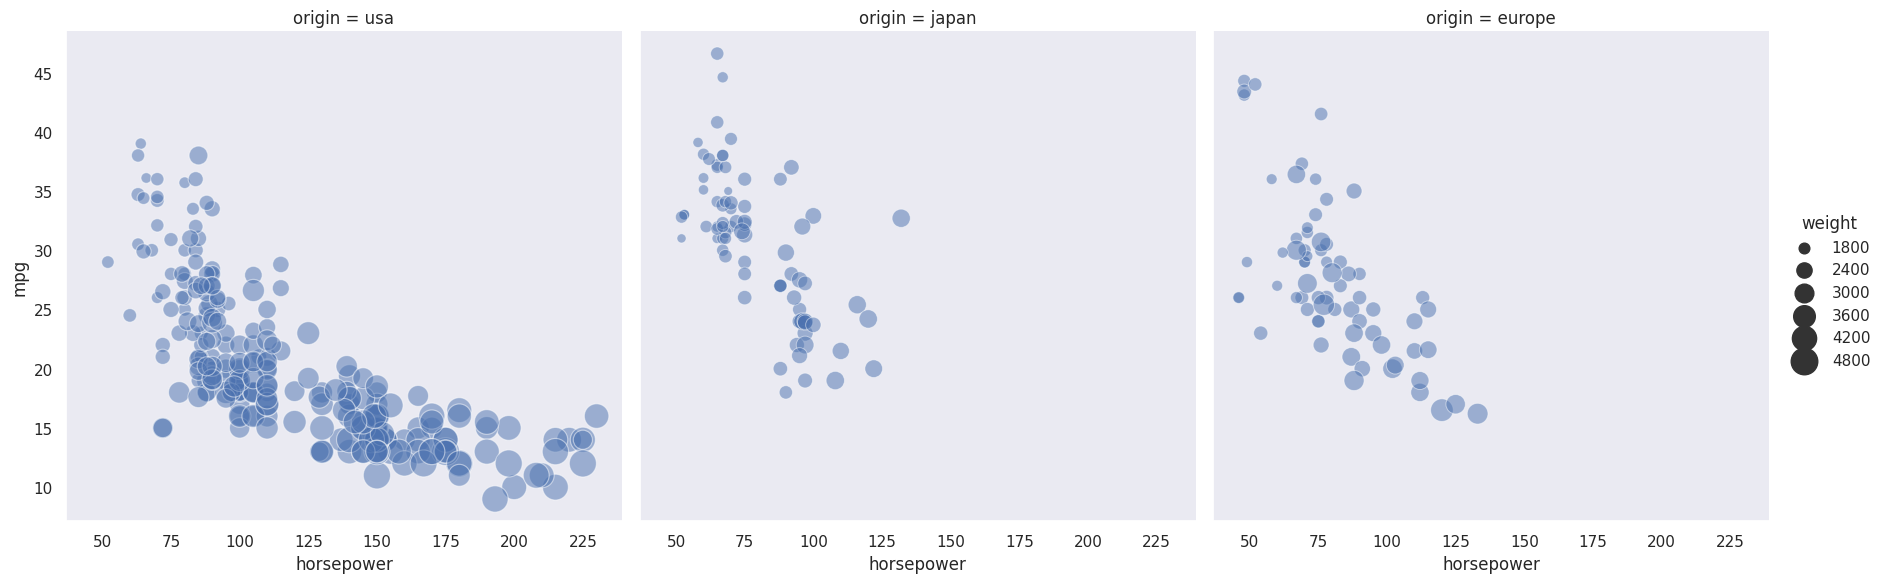

In [ ]:
sns.relplot(x="horsepower", y="mpg", col="origin", size="weight",
            sizes=(40, 400), alpha=.5,
            height=6, data=mpg)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

Haremos una matriz y un mapa de calor para ver donde se correlacionan nuestros datos:

In [ ]:
corr = mpg.corr()

corr

<ipython-input-5-6ada4c05cbd2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mpg.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<Axes: >

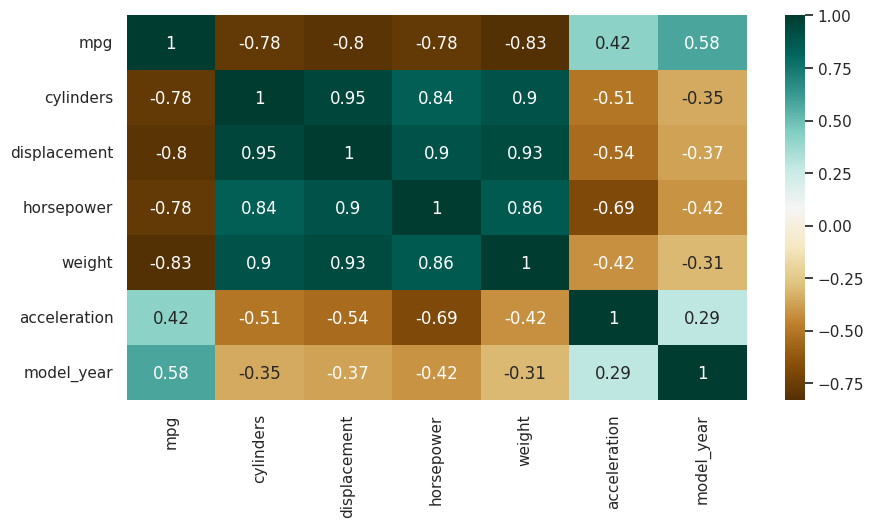

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,cmap="BrBG",annot=True)

De esta forma podemos saber que hay variables dependientes unas de otras por ejemplo, estan muy correlacionados los caballos de fuerza con el peso, el displacement y la cantidad de cilindros directamente proporcional, no así con el rendimiento, que sería inversamente proporcional.

Revisemos como se comportan estas relaciones

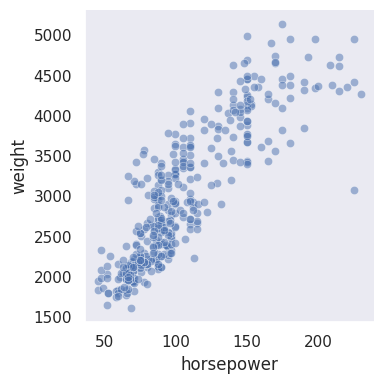

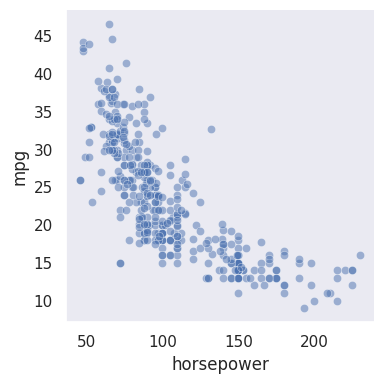

In [ ]:
# sns.relplot(x="horsepower", y="weight", hue="cylinders", size="displacement",
#             sizes=(40, 400), alpha=.5, palette="muted",
#             height=6, data=mpg)
sns.relplot(x="horsepower", y="weight",
            sizes=(40, 400), alpha=.5,
            height=4, data=mpg)
sns.relplot(x="horsepower", y="mpg",
            sizes=(40, 400), alpha=.5,
            height=4, data=mpg)

3) (1 punto) Construir y entrenar un modelo de regresion lineal


Con esto ya podríamos generar un modelo de regresión lineal cuyo objetivo sea estimar el rendimiento dependiendo de los cabllos de fuerza, cilindros, peso y displacement.

Acomodaremos nuestros datos entre prueba y entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split

mpg = mpg.dropna()

Y = mpg['mpg']
X = mpg.drop(['mpg','name'], axis=1)
X = pd.get_dummies(X, columns=["origin"])

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

Entrenamos al modelo con los datos de entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

Veamos como se comporta nuestra regresión

In [ ]:
x = X_train['horsepower']
y = Y_train #Valores de mpg

np.mean(x) #Promedio de los caballos de fuerza

105.81751824817518

$ Y = mX + c $

Siendo $ m $ pendiente y $ c $ donde se interceta en eje y

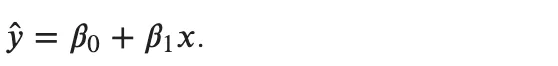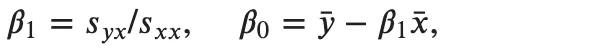

In [ ]:
# fuente https://blog.devgenius.io/linear-regression-using-automobile-mpg-data-46ccc09a04cc
xm = np.mean(x) #promedio hp
ym = np.mean(y) #promedio mpg
syx = np.mean((y-ym)*(x-xm)) #covarianza
sxx = np.mean((x-xm)**2)#varianza x
syy = np.mean((y-ym)**2)#varianza y
beta1 = syx/sxx
beta0 = ym - beta1*xm

Text(0, 0.5, 'mpg')

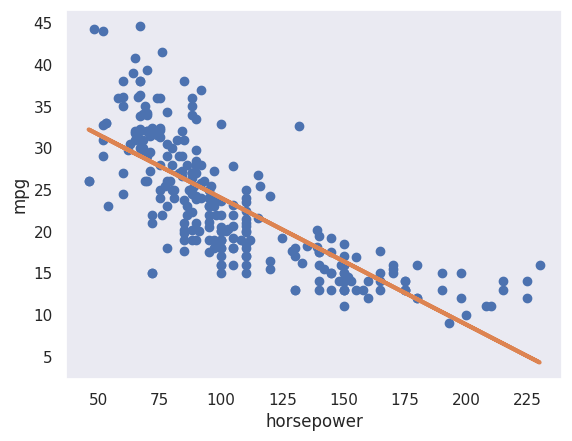

In [ ]:
ypred = beta1*x + beta0

plt.plot(x,y,'o')
plt.plot(x,ypred,'-',linewidth=3)
plt.xlabel('horsepower')
plt.ylabel('mpg')

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

Evaluaremos el rendimiento del modelo con score, este nos dará el coeficiente de determinación R² del modelo

In [ ]:
score = reg.score(X_test, Y_test)

score

0.7868560713009278

mientras más cercano a 1 mejor será el rendimiento de nuestra regresión y podemos ver que claramente hace una predicción apresurada, pero quizas bien asertiva, podríamos decir que acierta al 79% de las veces.

5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.